In [2]:
%matplotlib inline

In [3]:
# Présupposé => pandas a été introduit en partie au cours précédent

In [4]:
# We first read the french movies "entrées"
from lib.preprocessing.load import read_movies_entrees, read_movies_features
bo = read_movies_entrees('data/french-box-office-29nov2020.json')
bo

,year,title,id,sales,release_date
0,2019,Le Roi Lion (2019),17528,3252896,2019-07-17
1,2019,Maléfique : Le Pouvoir du Mal,19073,786485,2019-10-16
2,2019,Nous finirons ensemble,18875,1261701,2019-05-01
3,2019,Spider-Man: Far from Home,18243,1370178,2019-07-03
4,2019,Jumanji: next level,18258,785636,2019-12-04
...,...,...,...,...,...
7494,2017,La Planète des Singes - Suprématie,15748,1016520,2017-08-02
7495,2017,Cars 3,16452,950353,2017-08-02
7496,2017,Le Sens de la fête,17386,808544,2017-10-04
7497,2017,Cinquante nuances plus sombres,15186,1618110,2017-02-08


In [5]:
# Then fetch their main features. Note that it seems not all movies were found in the feature database
features = read_movies_features('data/movie-features-29nov2020.json')
features

,is_adult,is_part_of_collection,budget,genres,original_language,production_countries,languages,runtime,id
0,False,True,185000000,"[Fantastique, Familial, Aventure]",en,[US],[en],110.0,19073
1,False,True,0,"[Comédie, Drame]",fr,"[BE, FR]",[fr],135.0,18875
2,False,True,160000000,"[Action, Aventure, Science-Fiction]",en,[US],"[cs, nl, en, de, it]",129.0,18243
3,False,True,125000000,"[Aventure, Comédie, Fantastique]",en,[US],[en],123.0,18258
4,False,True,129000000,"[Animation, Familial, Aventure]",en,"[JP, US]",[en],104.0,18167
...,...,...,...,...,...,...,...,...,...
7048,False,True,150000000,"[Drame, Science-Fiction, Guerre]",en,"[CA, US, NZ]",[en],142.0,15748
7049,False,True,175000000,"[Aventure, Animation, Comédie, Familial]",en,[US],[en],109.0,16452
7050,False,False,17200000,[Comédie],fr,[FR],[fr],117.0,17386
7051,False,True,55000000,"[Drame, Romance]",en,[US],[en],118.0,15186


In [6]:
# Let's merge both dataframes
import pandas as pd
data = pd.merge(bo, features, on='id')
data

,year,title,id,sales,release_date,is_adult,is_part_of_collection,budget,genres,original_language,production_countries,languages,runtime
0,2019,Maléfique : Le Pouvoir du Mal,19073,786485,2019-10-16,False,True,185000000,"[Fantastique, Familial, Aventure]",en,[US],[en],110.0
1,2019,Nous finirons ensemble,18875,1261701,2019-05-01,False,True,0,"[Comédie, Drame]",fr,"[BE, FR]",[fr],135.0
2,2019,Spider-Man: Far from Home,18243,1370178,2019-07-03,False,True,160000000,"[Action, Aventure, Science-Fiction]",en,[US],"[cs, nl, en, de, it]",129.0
3,2019,Jumanji: next level,18258,785636,2019-12-04,False,True,125000000,"[Aventure, Comédie, Fantastique]",en,[US],[en],123.0
4,2019,Dragons 3 : Le monde caché,18167,1224811,2019-02-06,False,True,129000000,"[Animation, Familial, Aventure]",en,"[JP, US]",[en],104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7048,2017,La Planète des Singes - Suprématie,15748,1016520,2017-08-02,False,True,150000000,"[Drame, Science-Fiction, Guerre]",en,"[CA, US, NZ]",[en],142.0
7049,2017,Cars 3,16452,950353,2017-08-02,False,True,175000000,"[Aventure, Animation, Comédie, Familial]",en,[US],[en],109.0
7050,2017,Le Sens de la fête,17386,808544,2017-10-04,False,False,17200000,[Comédie],fr,[FR],[fr],117.0
7051,2017,Cinquante nuances plus sombres,15186,1618110,2017-02-08,False,True,55000000,"[Drame, Romance]",en,[US],[en],118.0


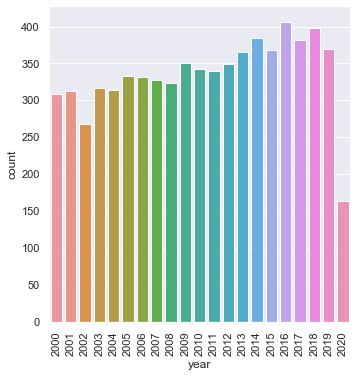

In [8]:
# Let's see the distribution of movies across years => rather uniform, 300 / 350 movies per year
import seaborn as sns
sns.set()
plot = sns.catplot(x="year", data=data, kind="count")
for axes in plot.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

In [15]:
# Let's explore our sales data

# It seems quite diverse : maybe some one zero sales that we'll need to investigate first and really large rare amounts (up to 4 millions and a half)
data['sales'].describe()

count    7.053000e+03
mean     1.853960e+05
std      3.390870e+05
min      0.000000e+00
25%      2.077800e+04
50%      6.846100e+04
75%      1.972830e+05
max      4.378720e+06
Name: sales, dtype: float64

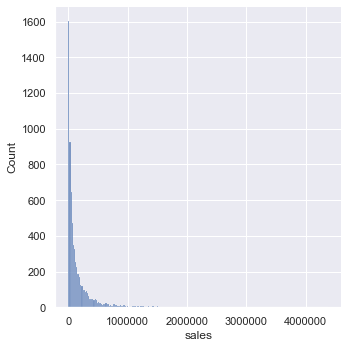

In [12]:
# Making a raw histogram confirms that.
sns.displot(data, x="sales")

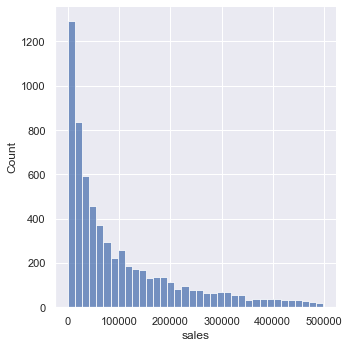

In [13]:
# It may be interesting to remove large sales to better understand what's happening on the lower end of the distribution tail
sns.displot(data[data['sales'] < 500000], x="sales")

In [14]:
# Let's have a look at the zero sales movies. 
# Not a lot, they come from a crawling error => the webpage did not have this information
# Should we get rid of it (shouldn't affect that much our results) ?
data[data["sales"] == 0]

,year,title,id,sales,is_adult,is_part_of_collection,budget,genres,original_language,production_countries,languages,runtime
184,2019,The Front Runner,18692,0,False,False,0,"[Drame, Histoire]",en,[US],[en],113.0
185,2019,Ayka,18915,0,False,False,0,[Drame],ru,"[DE, KZ, PL, RU]","[ru, kk, ky]",109.0
206,2019,Recep Ivedik 6,19806,0,False,True,0,[Comédie],tr,[TR],[tr],110.0
209,2019,303,18369,0,False,False,0,"[Drame, Romance, Comédie]",de,[DE],[hu],120.0
215,2019,Salauds de pauvres,19397,0,False,False,0,[Comédie],fr,[],[],106.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6494,2018,Hard Eight,3608,0,False,False,3000000,"[Drame, Thriller]",en,[US],[en],102.0
6541,2017,Voyage of Time : Au fil de la vie,16300,0,False,False,0,"[Documentaire, Drame]",en,"[DE, US, FR]",[en],90.0
6600,2018,Ma fille,18333,0,False,False,0,"[Drame, Crime]",fr,[FR],"[en, fr, de]",87.0
6663,2017,Seule la terre,17623,0,False,False,0,"[Romance, Drame]",en,[GB],"[en, ro]",104.0


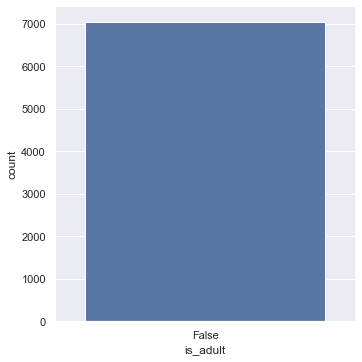

In [16]:
# Now let's explore other features. There do not seems to be any adult movie, this feature won't be useful
sns.catplot(x="is_adult", data=data, kind="count")

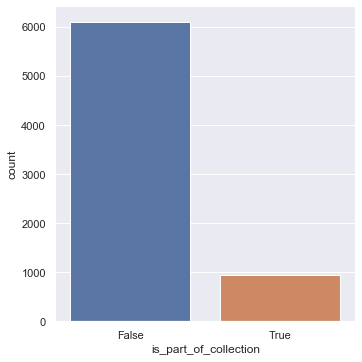

In [17]:
# A significant part of movies come from collections
# It'll be interesting to use this feature 
# - As a simple flag (sequel / prequel may be important to predict sales)
# - By encoding in a way the collection name (some collections may have more impact than others)
# - By using the collection previous sales (to guide even more our algorithm)
sns.catplot(x="is_part_of_collection", data=data, kind="count")

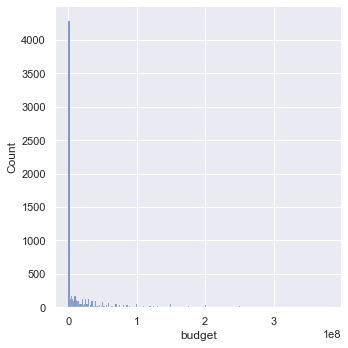

In [18]:
# Budget has a lot of zeros which seems unlikely => we'll need to fill in that variable in a way or another
sns.displot(data, x="budget")

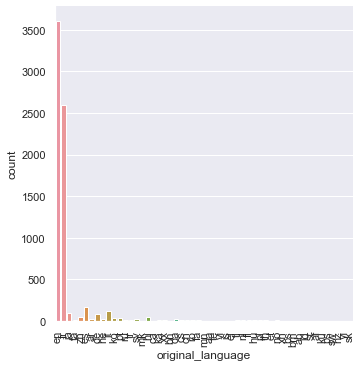

In [23]:
# Large part of english movies, followed by french movies. The rest of languages are way behind
plot = sns.catplot(x="original_language", data=data, kind="count")
for axes in plot.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

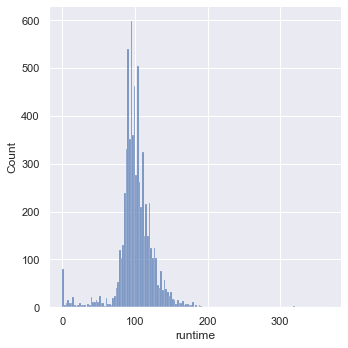

In [24]:
# Runtime seems legit => somehow a gaussian around 1 hour and a half. Some zeros however that we should preprocess next
# in a way or another
sns.displot(data, x="runtime")

In [34]:
# For genres, languages, production countries, data comes in list for each movie, 
# we should preprocess these columns before plotting them. Here we flatten the lists into a bigger Series

def flatten_list_series(column: pd.Series) -> pd.DataFrame:
    flattened_series = column.apply(pd.Series).stack().reset_index(drop=True)
    flattened_series.name = column.name
    return pd.DataFrame(flattened_series)

print(flatten_list_series(data['genres']))

            genres
0      Fantastique
1         Familial
2         Aventure
3          Comédie
4            Drame
...            ...
14507      Comédie
14508        Drame
14509      Romance
14510        Drame
14511      Comédie

[14512 rows x 1 columns]


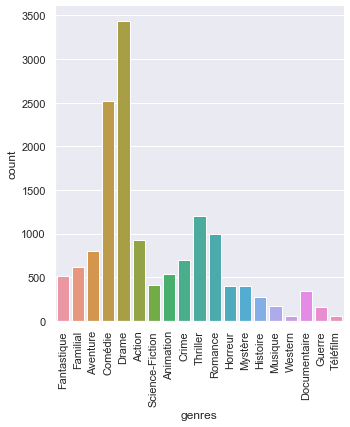

In [36]:
# When filled in, genres variable seems to be quite clean.
plot = sns.catplot(x='genres', data=flatten_list_series(data['genres']), kind="count")
for axes in plot.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

In [39]:
# There are a lot of available languages for these movies 
# => if we want to use this variable, we should maybe compress it (using embeddings ?) 
# instead of using a raw one hot encoding
languages = flatten_list_series(data['languages'])
languages.value_counts()

languages
en           3745
fr           2855
es            536
de            396
it            372
             ... 
eu              1
lo              1
lb              1
iu              1
ab              1
Length: 103, dtype: int64

In [40]:
# Same for production countries
countries = flatten_list_series(data['production_countries'])
countries.value_counts()

production_countries
FR                      2896
US                      2813
GB                       743
DE                       519
BE                       425
                        ... 
GH                         1
GF                         1
SU                         1
SV                         1
ZM                         1
Length: 121, dtype: int64

In [ ]:
# Learnings

#   - A small part of data seems corrupted (sales = 0) => should we still use it (true sales were low anyhow) or get rid of it ?
#   - Some variables have missing values (runtime and budget) => how do we fill in these variables (simple mean or median, more custom techniques)
#   - Some variables have no variance (is_adult) => we cannot use them
#   - Some variables (original_language) are perfect for one hot encoding
#   - Some variables are multilabelled (genres) => we should multilabel encode them
#   - Some variables are multilabelled (languages, production_countries) but with large cardinality => we should find a smart way to encode them 

# Not analyzed yet:
#   - NA data (where, can we fill it in?)
#   - Textual data (title, overview, tagline)
#   - More complex data (cast, production companies). We should maybe analyse prod companies countries, how much some produce a same movie / and also analyse actors information : gender, make embeddings of actors..;